In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns

In [85]:
data=pd.read_excel('./Inputs/Data_customer.xlsx')

## Analisis exploratorio de los datos

In [86]:
data.head()

,Customer Name,Categorias compradas,Rutas usadas,Plantas que lo abastecen,Unidades solicitadas,Lineas solicitadas,Pedidos realizados,Pedidos por semana
0,Cliente 1,1,1,1,2.0,1,1,0.026316
1,Cliente 2,12,1,2,37.0,33,15,0.394737
2,Cliente 3,6,1,1,6.0,6,6,0.157895
3,Cliente 4,109,2,2,43579.0,728,556,14.631579
4,Cliente 5,1,1,1,13.0,6,2,0.052632


In [87]:
data.isnull().sum()

Customer Name               0
Categorias compradas        0
Rutas usadas                0
Plantas que lo abastecen    0
Unidades solicitadas        0
Lineas solicitadas          0
Pedidos realizados          0
Pedidos por semana          0
dtype: int64

In [88]:
data[data.duplicated()]

,Customer Name,Categorias compradas,Rutas usadas,Plantas que lo abastecen,Unidades solicitadas,Lineas solicitadas,Pedidos realizados,Pedidos por semana


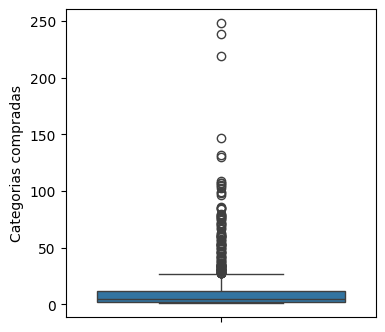

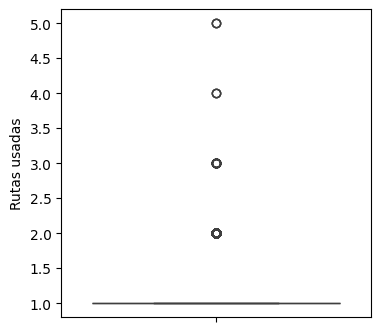

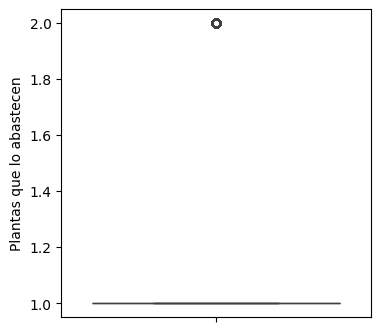

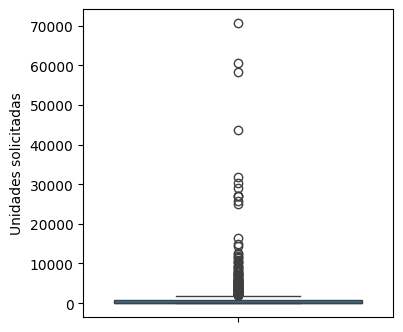

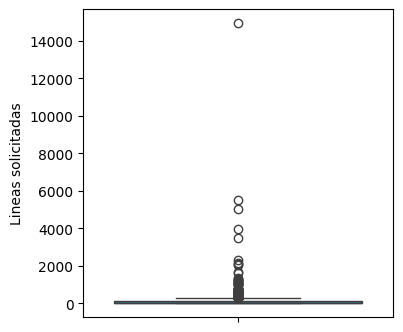

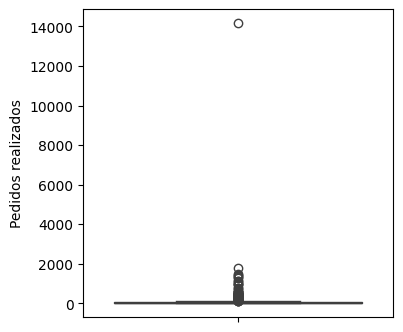

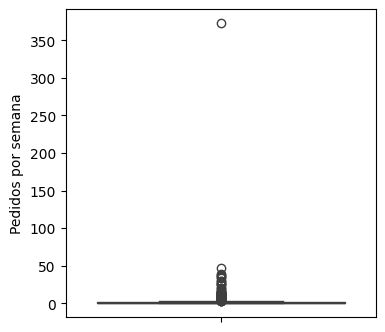

In [89]:
int_cols = data.select_dtypes(exclude='object').columns 
for _ in int_cols:
    plt.figure(figsize=(4,4))
    sns.boxplot(data=data, y= _)
    plt.show()

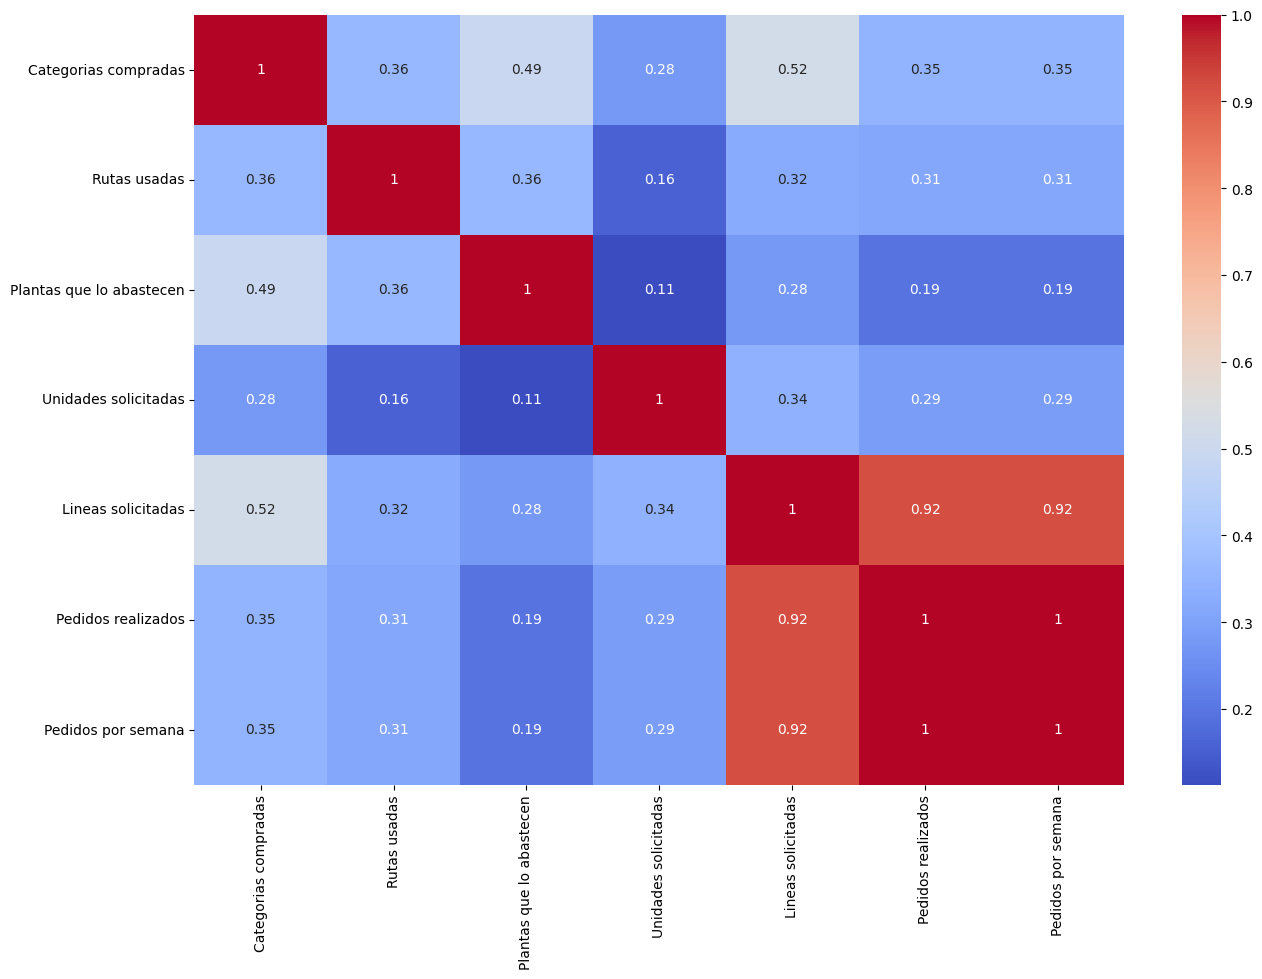

In [90]:
fig = plt.figure(figsize=(15,10))
sns.heatmap(data.select_dtypes(exclude='object').corr(), annot=True, cmap='coolwarm')
plt.show()

### Escalando Datos

In [91]:
from sklearn.preprocessing import StandardScaler
scaaler = StandardScaler()
data_scaled = scaaler.fit_transform(data.select_dtypes(exclude='object'))
data_scaled = pd.DataFrame(data_scaled, columns = data.select_dtypes(exclude='object').columns )

In [92]:
data_scaled

,Categorias compradas,Rutas usadas,Plantas que lo abastecen,Unidades solicitadas,Lineas solicitadas,Pedidos realizados,Pedidos por semana
0,-0.509524,-0.492740,-0.47410,-0.278734,-0.241011,-0.169215,-0.169215
1,-0.054346,-0.492740,2.10926,-0.272152,-0.192763,-0.142806,-0.142806
2,-0.302625,-0.492740,-0.47410,-0.277982,-0.233472,-0.159783,-0.159783
3,3.959489,1.215852,2.10926,7.916536,0.855136,0.877719,0.877719
4,-0.509524,-0.492740,-0.47410,-0.276666,-0.233472,-0.167329,-0.167329
...,...,...,...,...,...,...,...
796,-0.302625,-0.492740,-0.47410,0.914345,-0.182208,-0.105078,-0.105078
797,-0.344005,-0.492740,-0.47410,0.047181,-0.198794,-0.120169,-0.120169
798,-0.385384,-0.492740,-0.47410,1.691049,-0.182208,-0.101306,-0.101306
799,-0.426764,-0.492740,-0.47410,2.825640,-0.165623,-0.080556,-0.080556


### Aplicando PCA

In [93]:
from sklearn.decomposition import PCA 
pca = PCA()
pca.fit(data_scaled)
pca_data_scaled = pca.transform(data_scaled)
pca_data_scaled

array([[-7.61514436e-01,  5.68704053e-01, -9.28506143e-02, ...,
        -3.05281026e-02,  1.34871088e-02, -1.11022302e-16],
       [ 4.89090672e-02, -1.22280270e+00, -4.04994835e-01, ...,
        -1.38985557e+00, -6.20963964e-02, -1.98452366e-15],
       [-6.79387326e-01,  4.85007030e-01, -7.13866661e-02, ...,
         1.14703034e-01, -2.92950286e-02, -1.24900090e-16],
       ...,
       [-1.67196256e-01,  5.48862935e-01,  1.74743674e+00, ...,
        -3.29720099e-01, -5.98713160e-02,  2.19269047e-15],
       [ 1.11205932e-01,  5.71974280e-01,  2.80079795e+00, ...,
        -5.79496515e-01, -8.01504401e-02,  3.53883589e-15],
       [-5.36003999e-01,  5.70236470e-01,  2.26983803e-01, ...,
        -2.10115827e-02, -2.10986003e-02,  2.49800181e-16]])

In [94]:
var = pca.explained_variance_ratio_
print(var)

[5.14316298e-01 1.85351409e-01 1.24630234e-01 9.71836406e-02
 6.76464713e-02 1.08719476e-02 2.11153578e-33]


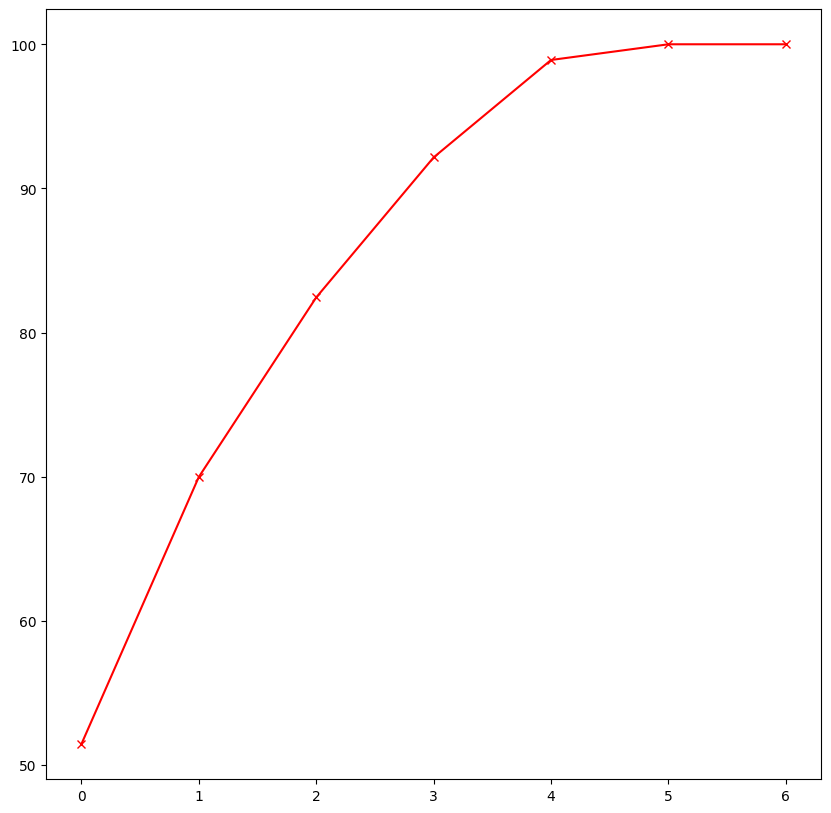

In [95]:
cum_var = np.cumsum(np.round(var, decimals=4)*100) 
plt.figure(figsize=(10,10))
plt.plot(cum_var, 'r-x')
plt.show()

In [96]:
pca_data_standard = pd.DataFrame(pca_data_scaled)
pca_data_standard.drop([5,6],axis=1, inplace=True)

### Importando librerias para aplicar clusterizacion

In [97]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

## K-Means

#### PCA

In [98]:
Sum_of_squared_distances = []
silhouette_scores = []
K = range(2,15) 
for _ in K:
    km = KMeans(n_clusters = _)
    y = km.fit_predict(pca_data_standard)
    Sum_of_squared_distances.append(km.inertia_)
    silhouette_scores.append(silhouette_score(pca_data_standard,y))

c:\Users\delgaf18\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\delgaf18\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\delgaf18\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\delgaf18\AppData\Local\Programs\Python\Python312\Lib\site-packages\

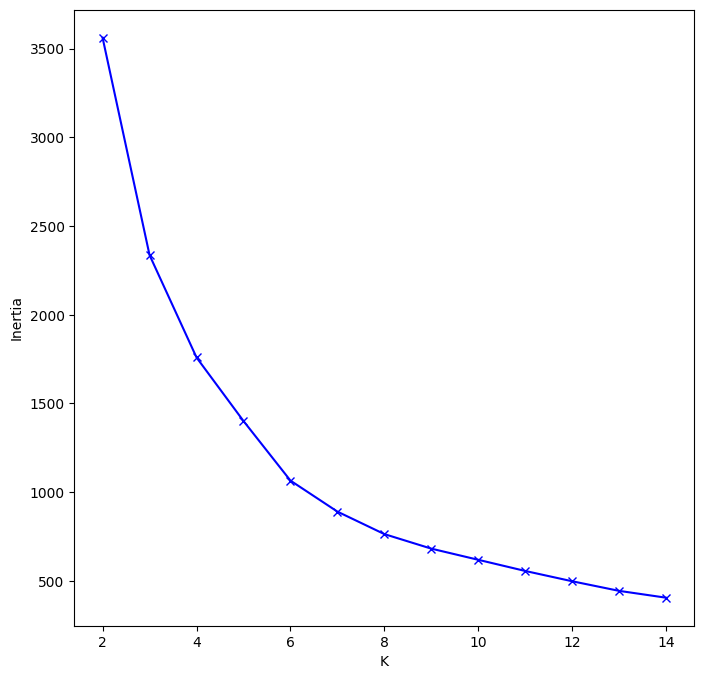

In [99]:
fig = plt.figure(figsize=(8,8))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

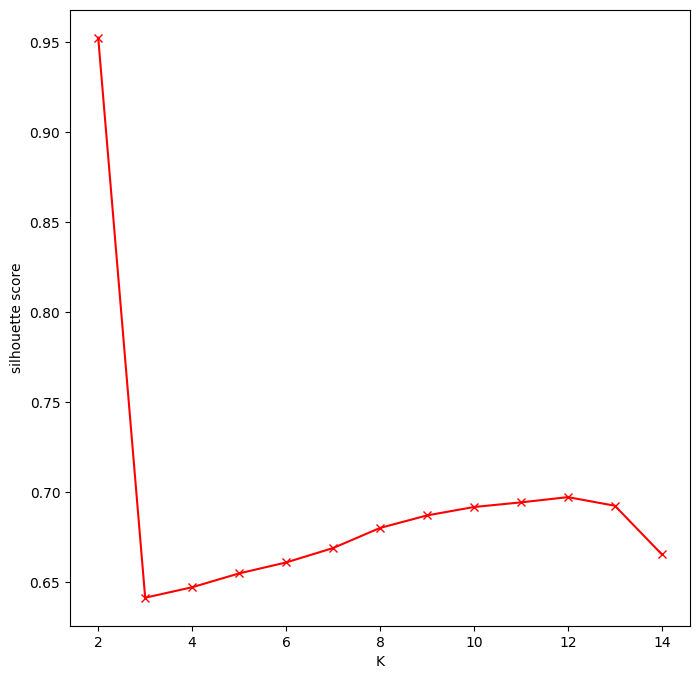

In [100]:
fig = plt.figure(figsize=(8,8))
plt.plot(K, silhouette_scores, 'rx-')
plt.xlabel('K')
plt.ylabel('silhouette score')
plt.show()

In [101]:
km = KMeans(n_clusters = 4)
y = km.fit_predict(pca_data_standard)
print(silhouette_score(pca_data_standard, y))
data['k_means_pca'] = y

0.6461322448374359


c:\Users\delgaf18\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


### Sin PCA

In [102]:
Sum_of_squared_distances = []
silhouette_scores = []
K = range(2,15) 
for _ in K:
    km = KMeans(n_clusters = _)
    y = km.fit_predict(data_scaled)
    Sum_of_squared_distances.append(km.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled,y))

c:\Users\delgaf18\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\delgaf18\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\delgaf18\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\delgaf18\AppData\Local\Programs\Python\Python312\Lib\site-packages\

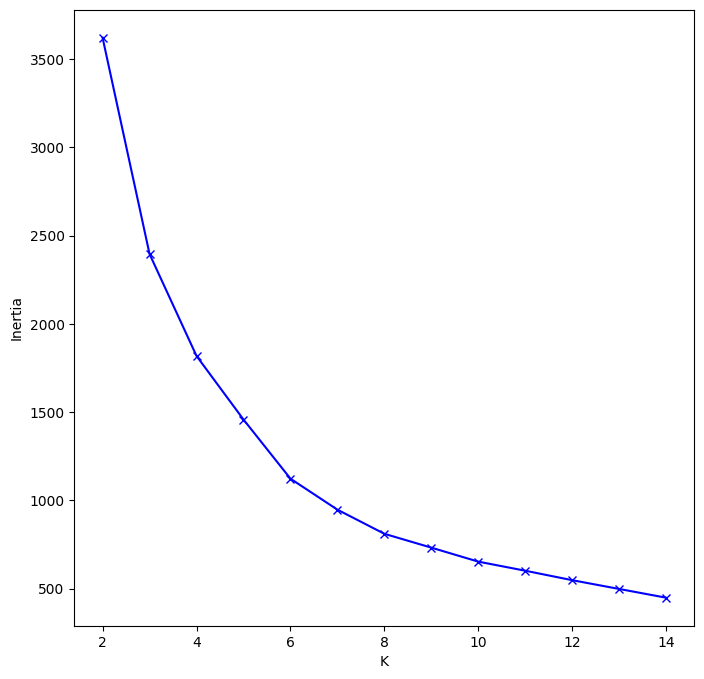

In [103]:
fig = plt.figure(figsize=(8,8))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

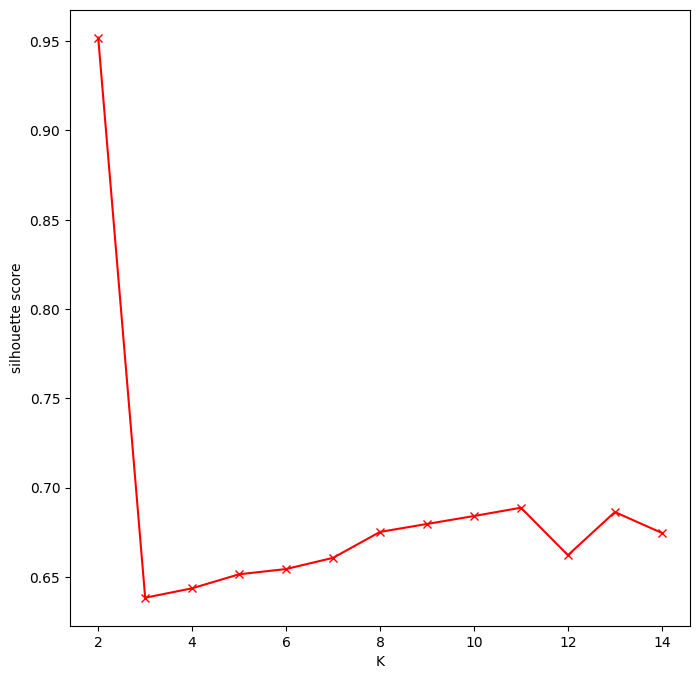

In [104]:
fig = plt.figure(figsize=(8,8))
plt.plot(K, silhouette_scores, 'rx-')
plt.xlabel('K')
plt.ylabel('silhouette score')
plt.show()

In [105]:
km = KMeans(n_clusters = 8)
y = km.fit_predict(data_scaled)
print(silhouette_score(data_scaled, y))
data['k_means'] = y

0.6765793606433949


c:\Users\delgaf18\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


## Agglomerativen hierarchical clustering

### PCA

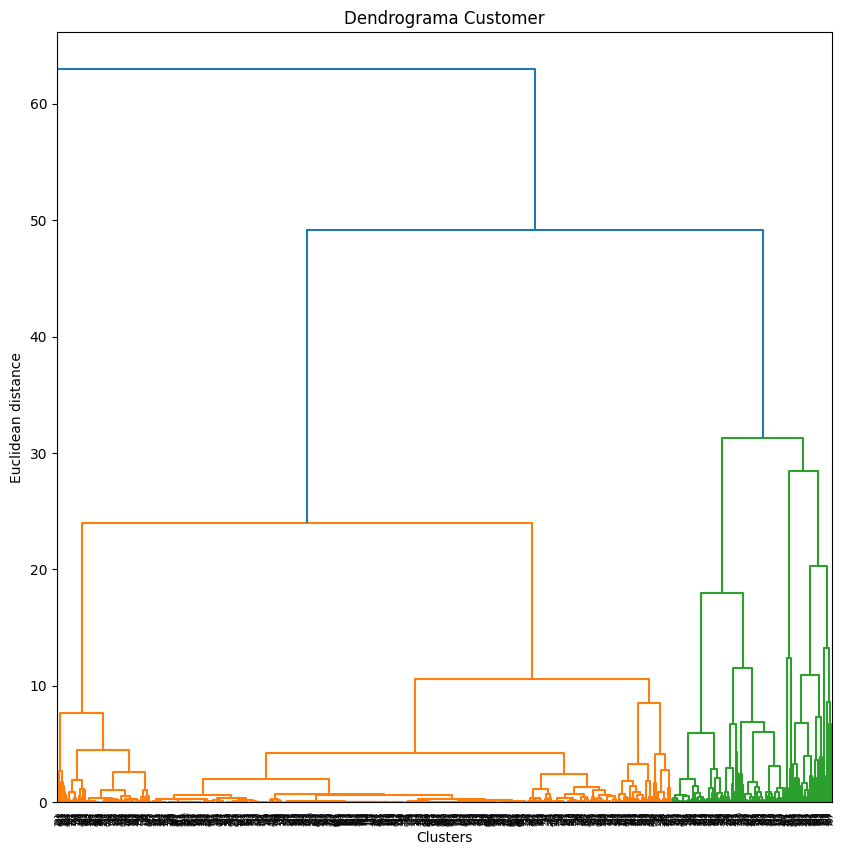

In [106]:
fig = plt.figure(figsize=(10,10))
dendrogram_plot = dendrogram(linkage(pca_data_standard, method='ward'))
plt.title('Dendrograma Customer')
plt.xlabel('Clusters')
plt.ylabel('Euclidean distance')
plt.show()

In [107]:
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(pca_data_standard)
print(silhouette_score(pca_data_standard,y_hc ))
data['hc_pca'] = y_hc

0.638971010270027


c:\Users\delgaf18\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


### Sin PCA

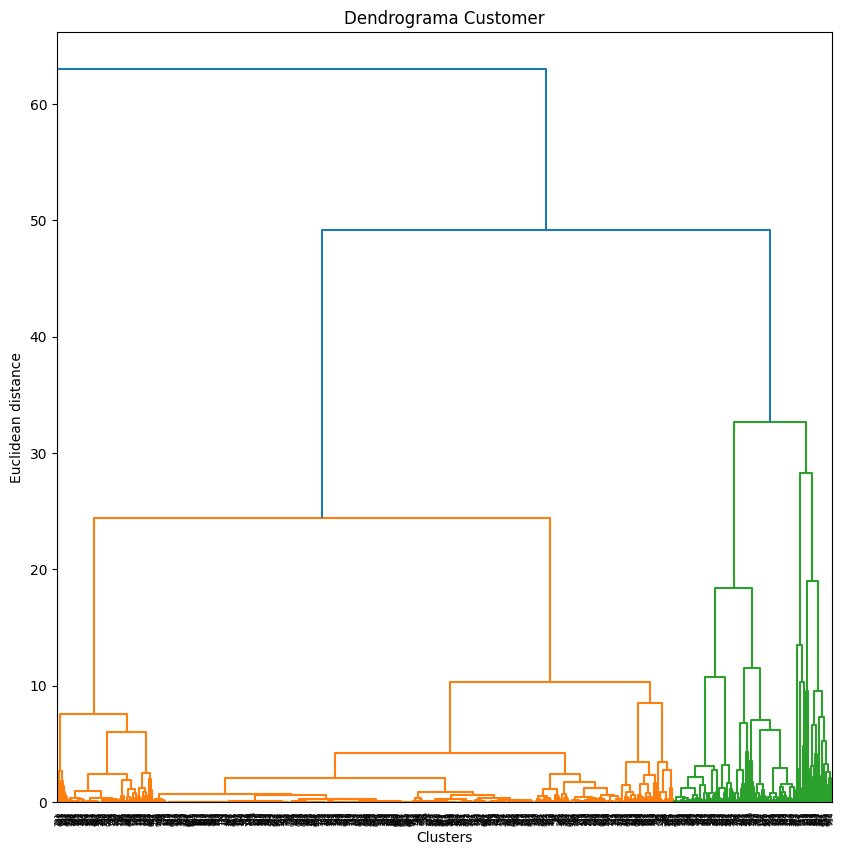

In [108]:
fig = plt.figure(figsize=(10,10))
dendrogram_plot = dendrogram(linkage(data_scaled, method='ward'))
plt.title('Dendrograma Customer')
plt.xlabel('Clusters')
plt.ylabel('Euclidean distance')
plt.show()

In [109]:
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(data_scaled)
print(silhouette_score(data_scaled,y_hc ))
data['hc'] = y_hc

0.6407515493907265


c:\Users\delgaf18\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


## DBSCAN

### PCA

In [110]:
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=6)
neighbors_fit = neighbors.fit(pca_data_standard)
distances, indices = neighbors_fit.kneighbors(pca_data_standard)

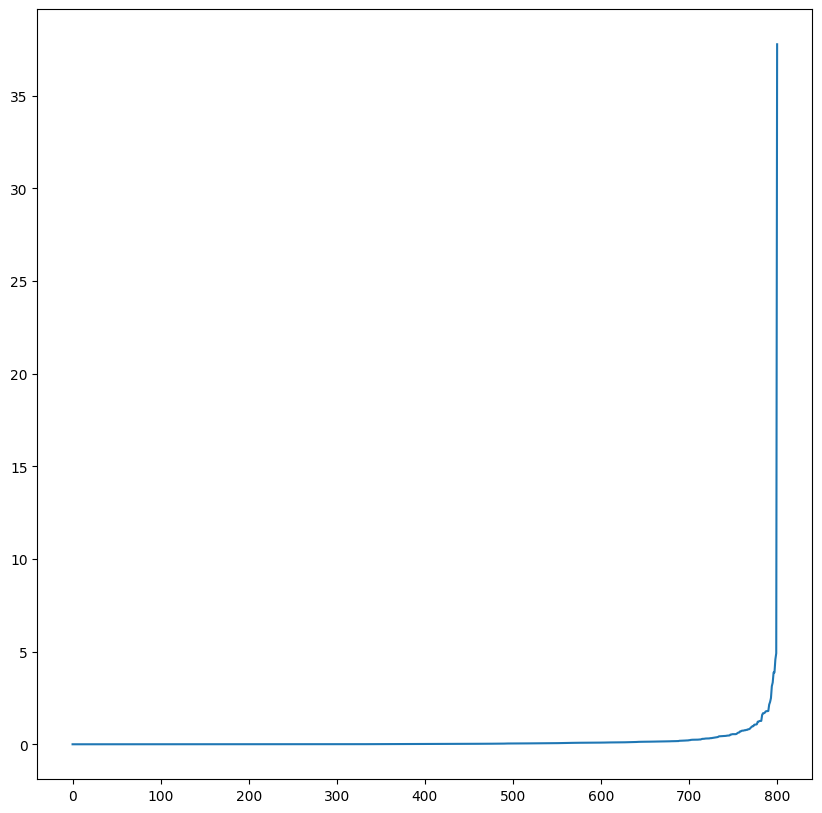

In [111]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
fig = plt.figure(figsize=(10,10))
plt.plot(distances)

In [112]:
eps_values = np.arange(0.5, 5.0, 0.10)
min_samples = np.arange(2,10)

In [113]:
from itertools import product 
dbscan_paramns = list(product(eps_values,min_samples))
no_of_clusters = []
sil_score = []
for p in dbscan_paramns:
    y_dbscan = DBSCAN(eps=p[0], min_samples=p[1]).fit_predict(pca_data_standard)
    try:
        sil_score.append(silhouette_score(pca_data_standard,y_dbscan))
    except:
        sil_score.append(0)    
    no_of_clusters.append(len(np.unique(y_dbscan)))


In [114]:
df_param_tunning = pd.DataFrame.from_records(dbscan_paramns, columns=['Eps','Min_samples'])
df_param_tunning['sil_score'] = sil_score
df_param_tunning['n_clusters'] = no_of_clusters

In [115]:
pivot_1 = pd.pivot_table(df_param_tunning, values='sil_score', columns='Eps', index='Min_samples')
pivot_2 = pd.pivot_table(df_param_tunning, values='n_clusters', columns='Eps', index='Min_samples')

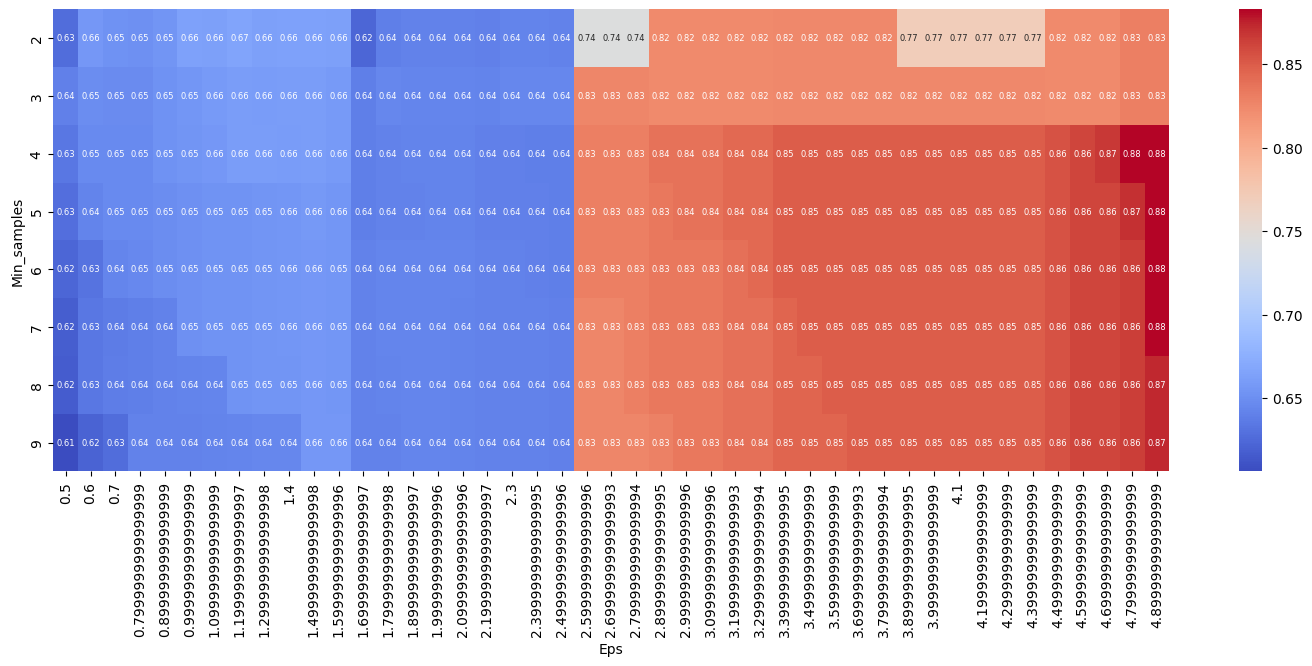

In [116]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={'size':6}, cmap='coolwarm', ax=ax)
plt.show()

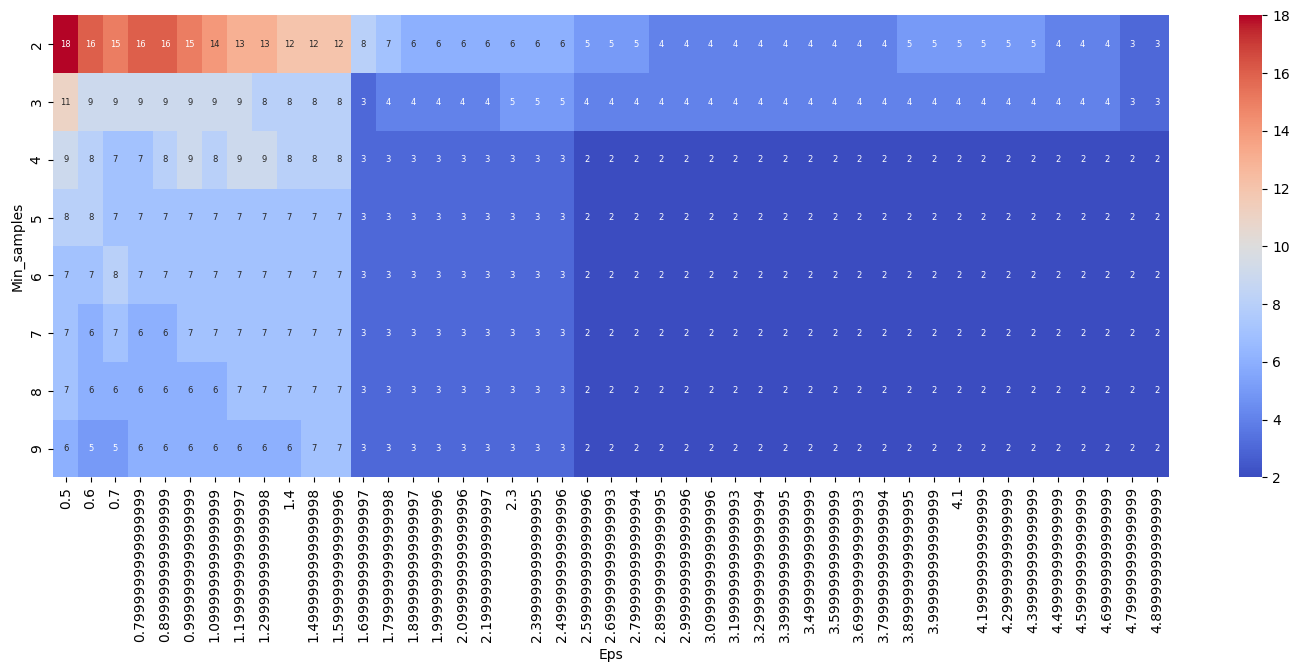

In [117]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_2, annot=True, annot_kws={'size':6}, cmap='coolwarm', ax=ax)
plt.show()

In [118]:
dbscan_train = DBSCAN(eps=0.5, min_samples=6)
y_dbscan = dbscan_train.fit_predict(pca_data_standard)
print(silhouette_score(pca_data_standard,y_dbscan ))
data['dbscan_pca'] = y_dbscan

0.6233812975361255


### Sin PCA

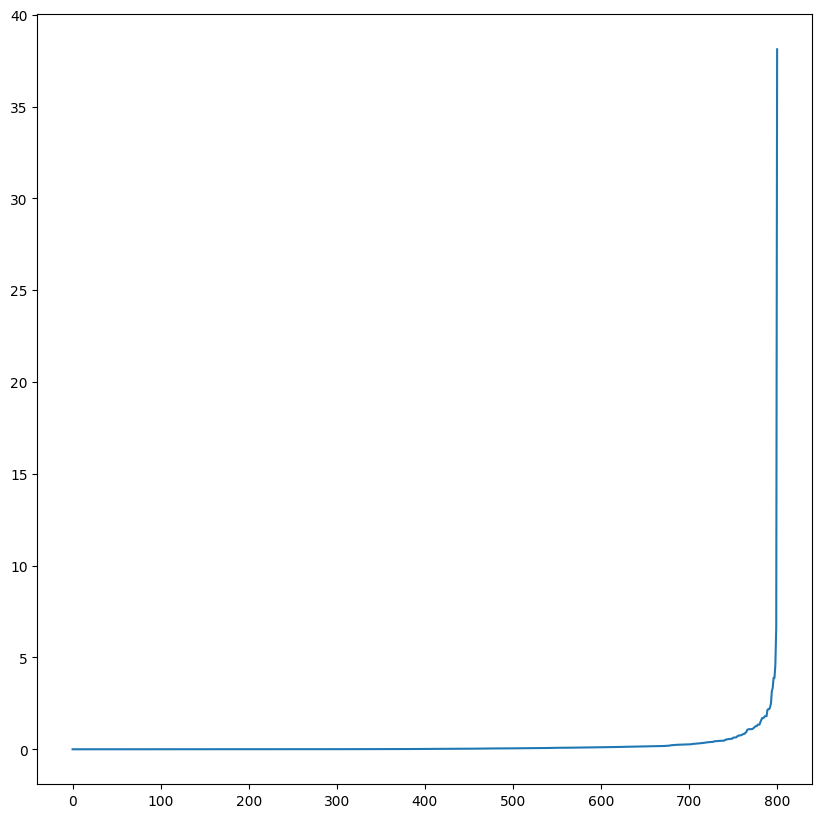

In [119]:
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(data_scaled)
distances, indices = neighbors_fit.kneighbors(data_scaled)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
fig = plt.figure(figsize=(10,10))
plt.plot(distances)

In [120]:
eps_values = np.arange(1, 3.0, 0.10)
min_samples = np.arange(3,10)

In [121]:
from itertools import product 
dbscan_paramns = list(product(eps_values,min_samples))
no_of_clusters = []
sil_score = []
for p in dbscan_paramns:
    y_dbscan = DBSCAN(eps=p[0], min_samples=p[1]).fit_predict(data_scaled)
    try:
        sil_score.append(silhouette_score(data_scaled,y_dbscan))
    except:
        sil_score.append(0)    
    no_of_clusters.append(len(np.unique(y_dbscan)))

In [122]:
df_param_tunning = pd.DataFrame.from_records(dbscan_paramns, columns=['Eps','Min_samples'])
df_param_tunning['sil_score'] = sil_score
df_param_tunning['n_clusters'] = no_of_clusters

In [123]:
pivot_1 = pd.pivot_table(df_param_tunning, values='sil_score', columns='Eps', index='Min_samples')
pivot_2 = pd.pivot_table(df_param_tunning, values='n_clusters', columns='Eps', index='Min_samples')

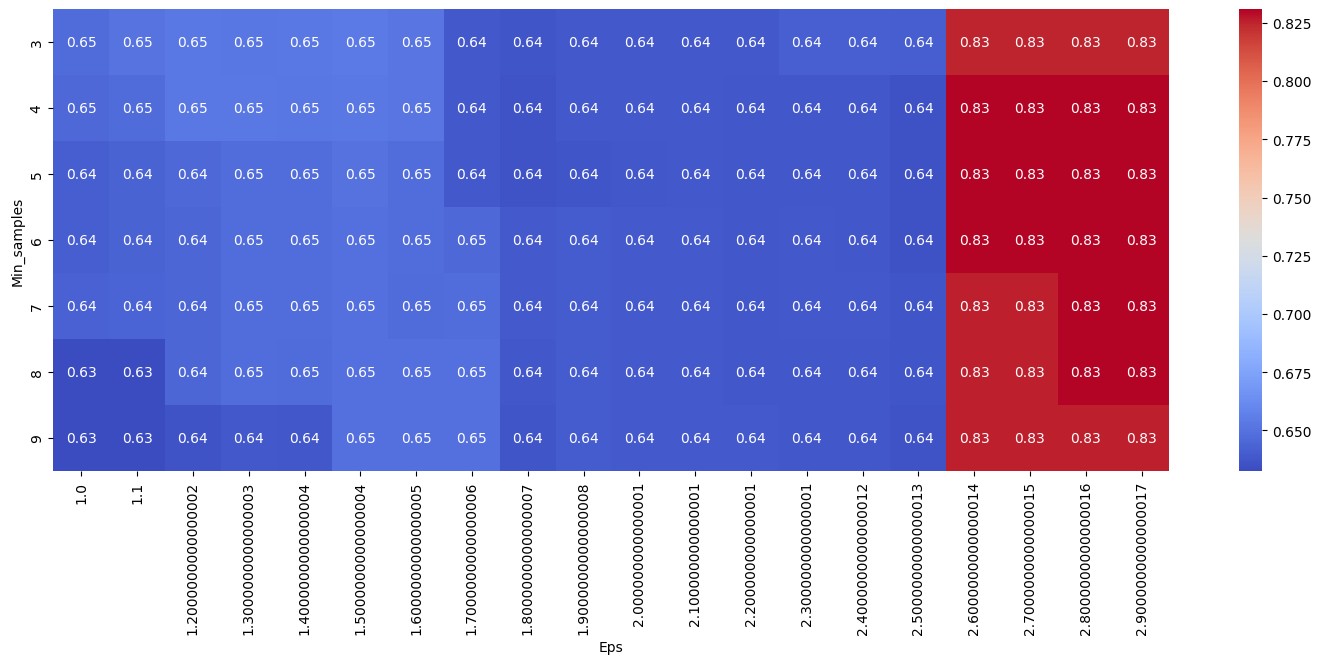

In [124]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()

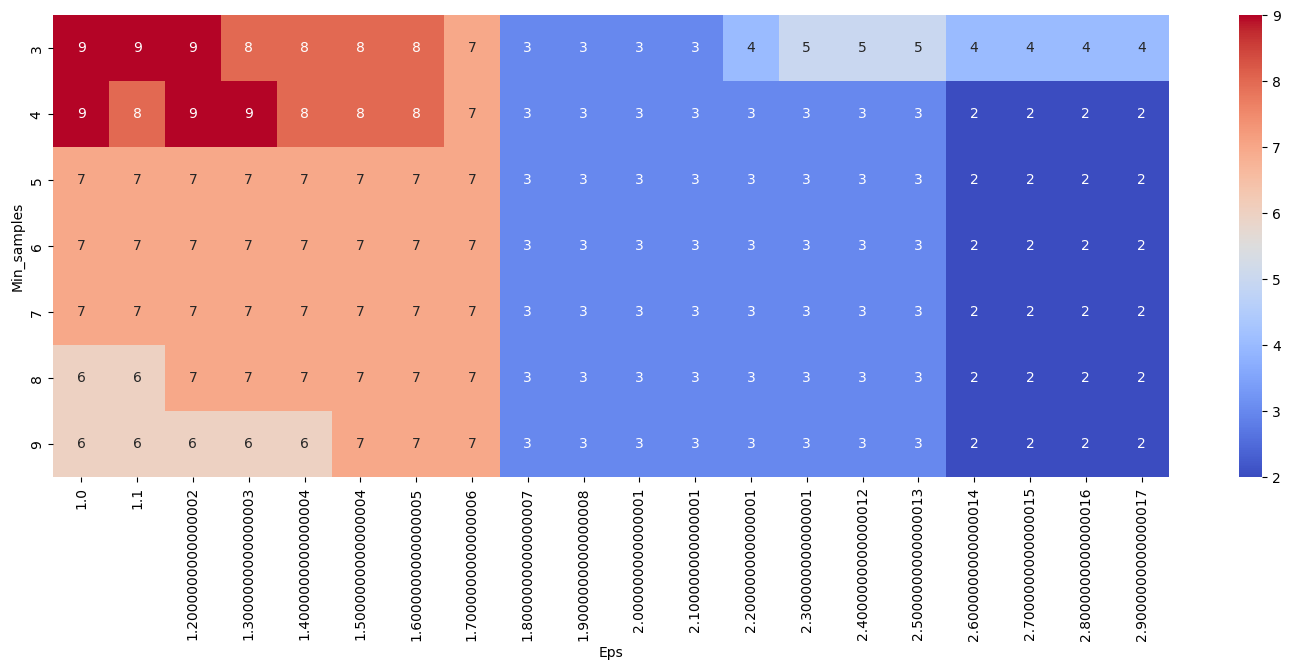

In [125]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_2, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()

In [126]:
dbscan_train = DBSCAN(eps=2.3, min_samples=3)
y_dbscan = dbscan_train.fit_predict(data_scaled)
print(silhouette_score(data_scaled,y_dbscan ))
data['dbscan_cluster'] = y_dbscan

0.6415911585947739


# Evaluacion de modelos

In [127]:
data.columns

Index(['Customer Name', 'Categorias compradas', 'Rutas usadas',
       'Plantas que lo abastecen', 'Unidades solicitadas',
       'Lineas solicitadas', 'Pedidos realizados', 'Pedidos por semana',
       'k_means_pca', 'k_means', 'hc_pca', 'hc', 'dbscan_pca',
       'dbscan_cluster'],
      dtype='object')

In [128]:
data

,Customer Name,Categorias compradas,Rutas usadas,Plantas que lo abastecen,Unidades solicitadas,Lineas solicitadas,Pedidos realizados,Pedidos por semana,k_means_pca,k_means,hc_pca,hc,dbscan_pca,dbscan_cluster
0,Cliente 1,1,1,1,2.0,1,1,0.026316,1,0,2,2,0,0
1,Cliente 2,12,1,2,37.0,33,15,0.394737,0,6,1,1,1,1
2,Cliente 3,6,1,1,6.0,6,6,0.157895,1,0,2,2,0,0
3,Cliente 4,109,2,2,43579.0,728,556,14.631579,3,3,0,0,-1,-1
4,Cliente 5,1,1,1,13.0,6,2,0.052632,1,0,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,Cliente 797,6,1,1,6346.0,40,35,0.921053,1,0,2,2,0,0
797,Cliente 798,5,1,1,1735.0,29,27,0.710526,1,0,2,2,0,0
798,Cliente 799,4,1,1,10476.0,40,37,0.973684,1,0,2,2,0,0
799,Cliente 800,3,1,1,16509.0,51,48,1.263158,1,0,2,2,-1,0


In [129]:
print(data.columns)


Index(['Customer Name', 'Categorias compradas', 'Rutas usadas',
       'Plantas que lo abastecen', 'Unidades solicitadas',
       'Lineas solicitadas', 'Pedidos realizados', 'Pedidos por semana',
       'k_means_pca', 'k_means', 'hc_pca', 'hc', 'dbscan_pca',
       'dbscan_cluster'],
      dtype='object')


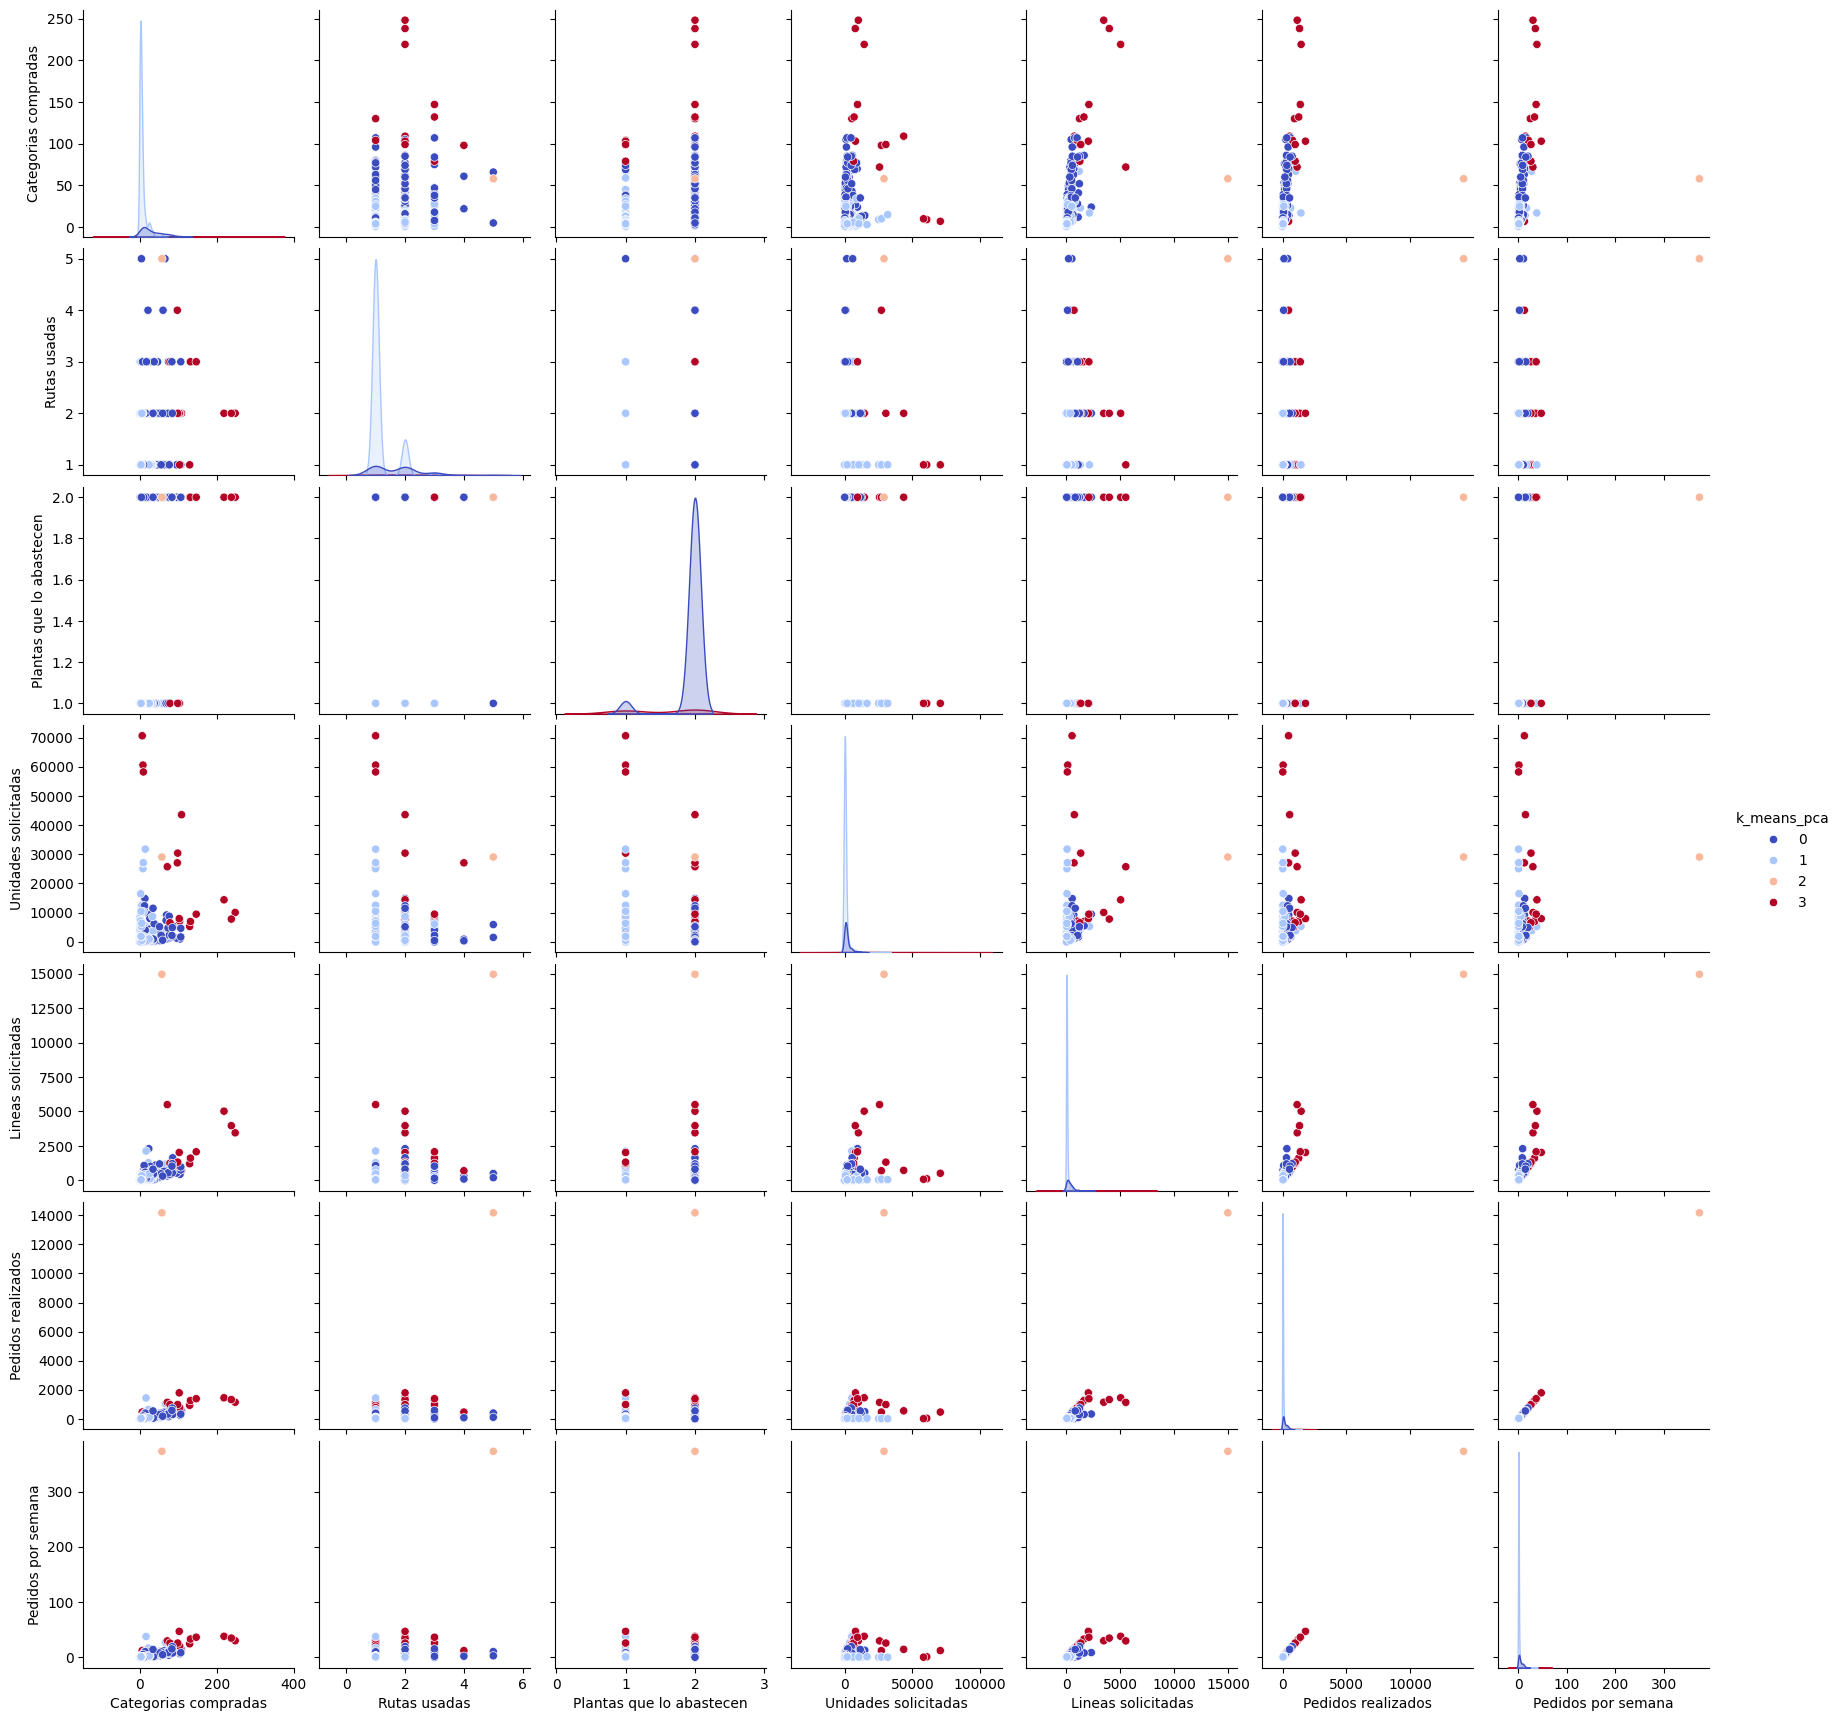

In [132]:
sns.pairplot(data = data[['Categorias compradas', 'Rutas usadas',
       'Plantas que lo abastecen', 'Unidades solicitadas',
       'Lineas solicitadas', 'Pedidos realizados', 'Pedidos por semana','k_means_pca']], hue='k_means_pca', palette='coolwarm')

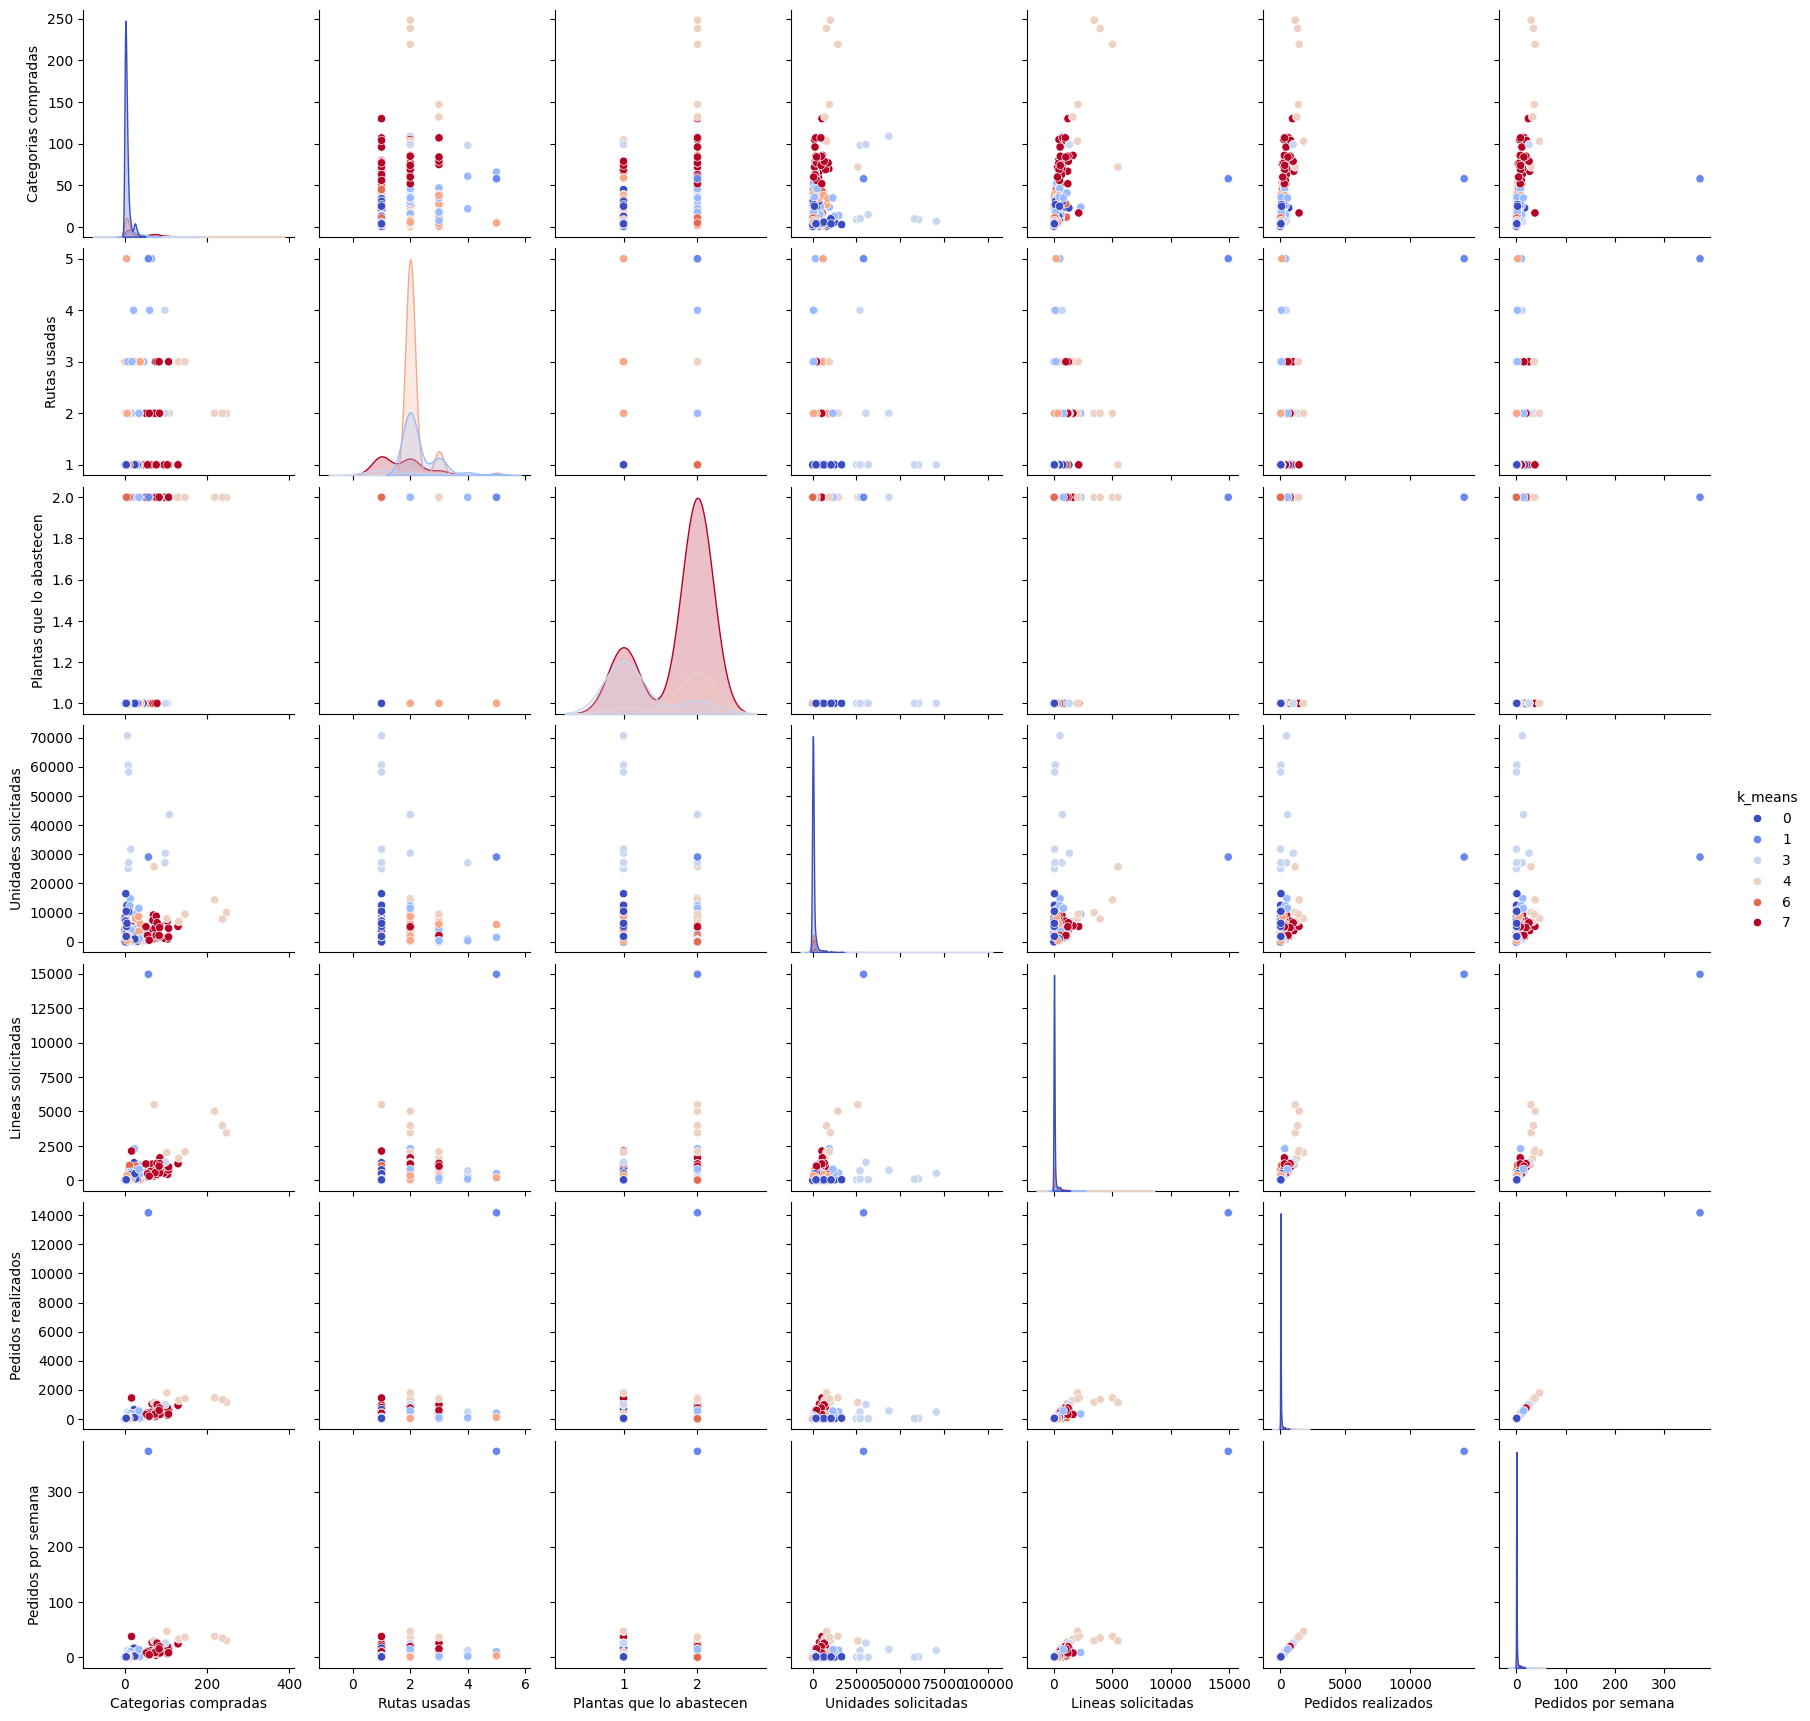

In [133]:
sns.pairplot(data = data[['Categorias compradas', 'Rutas usadas',
       'Plantas que lo abastecen', 'Unidades solicitadas',
       'Lineas solicitadas', 'Pedidos realizados', 'Pedidos por semana','k_means']], hue='k_means', palette='coolwarm')

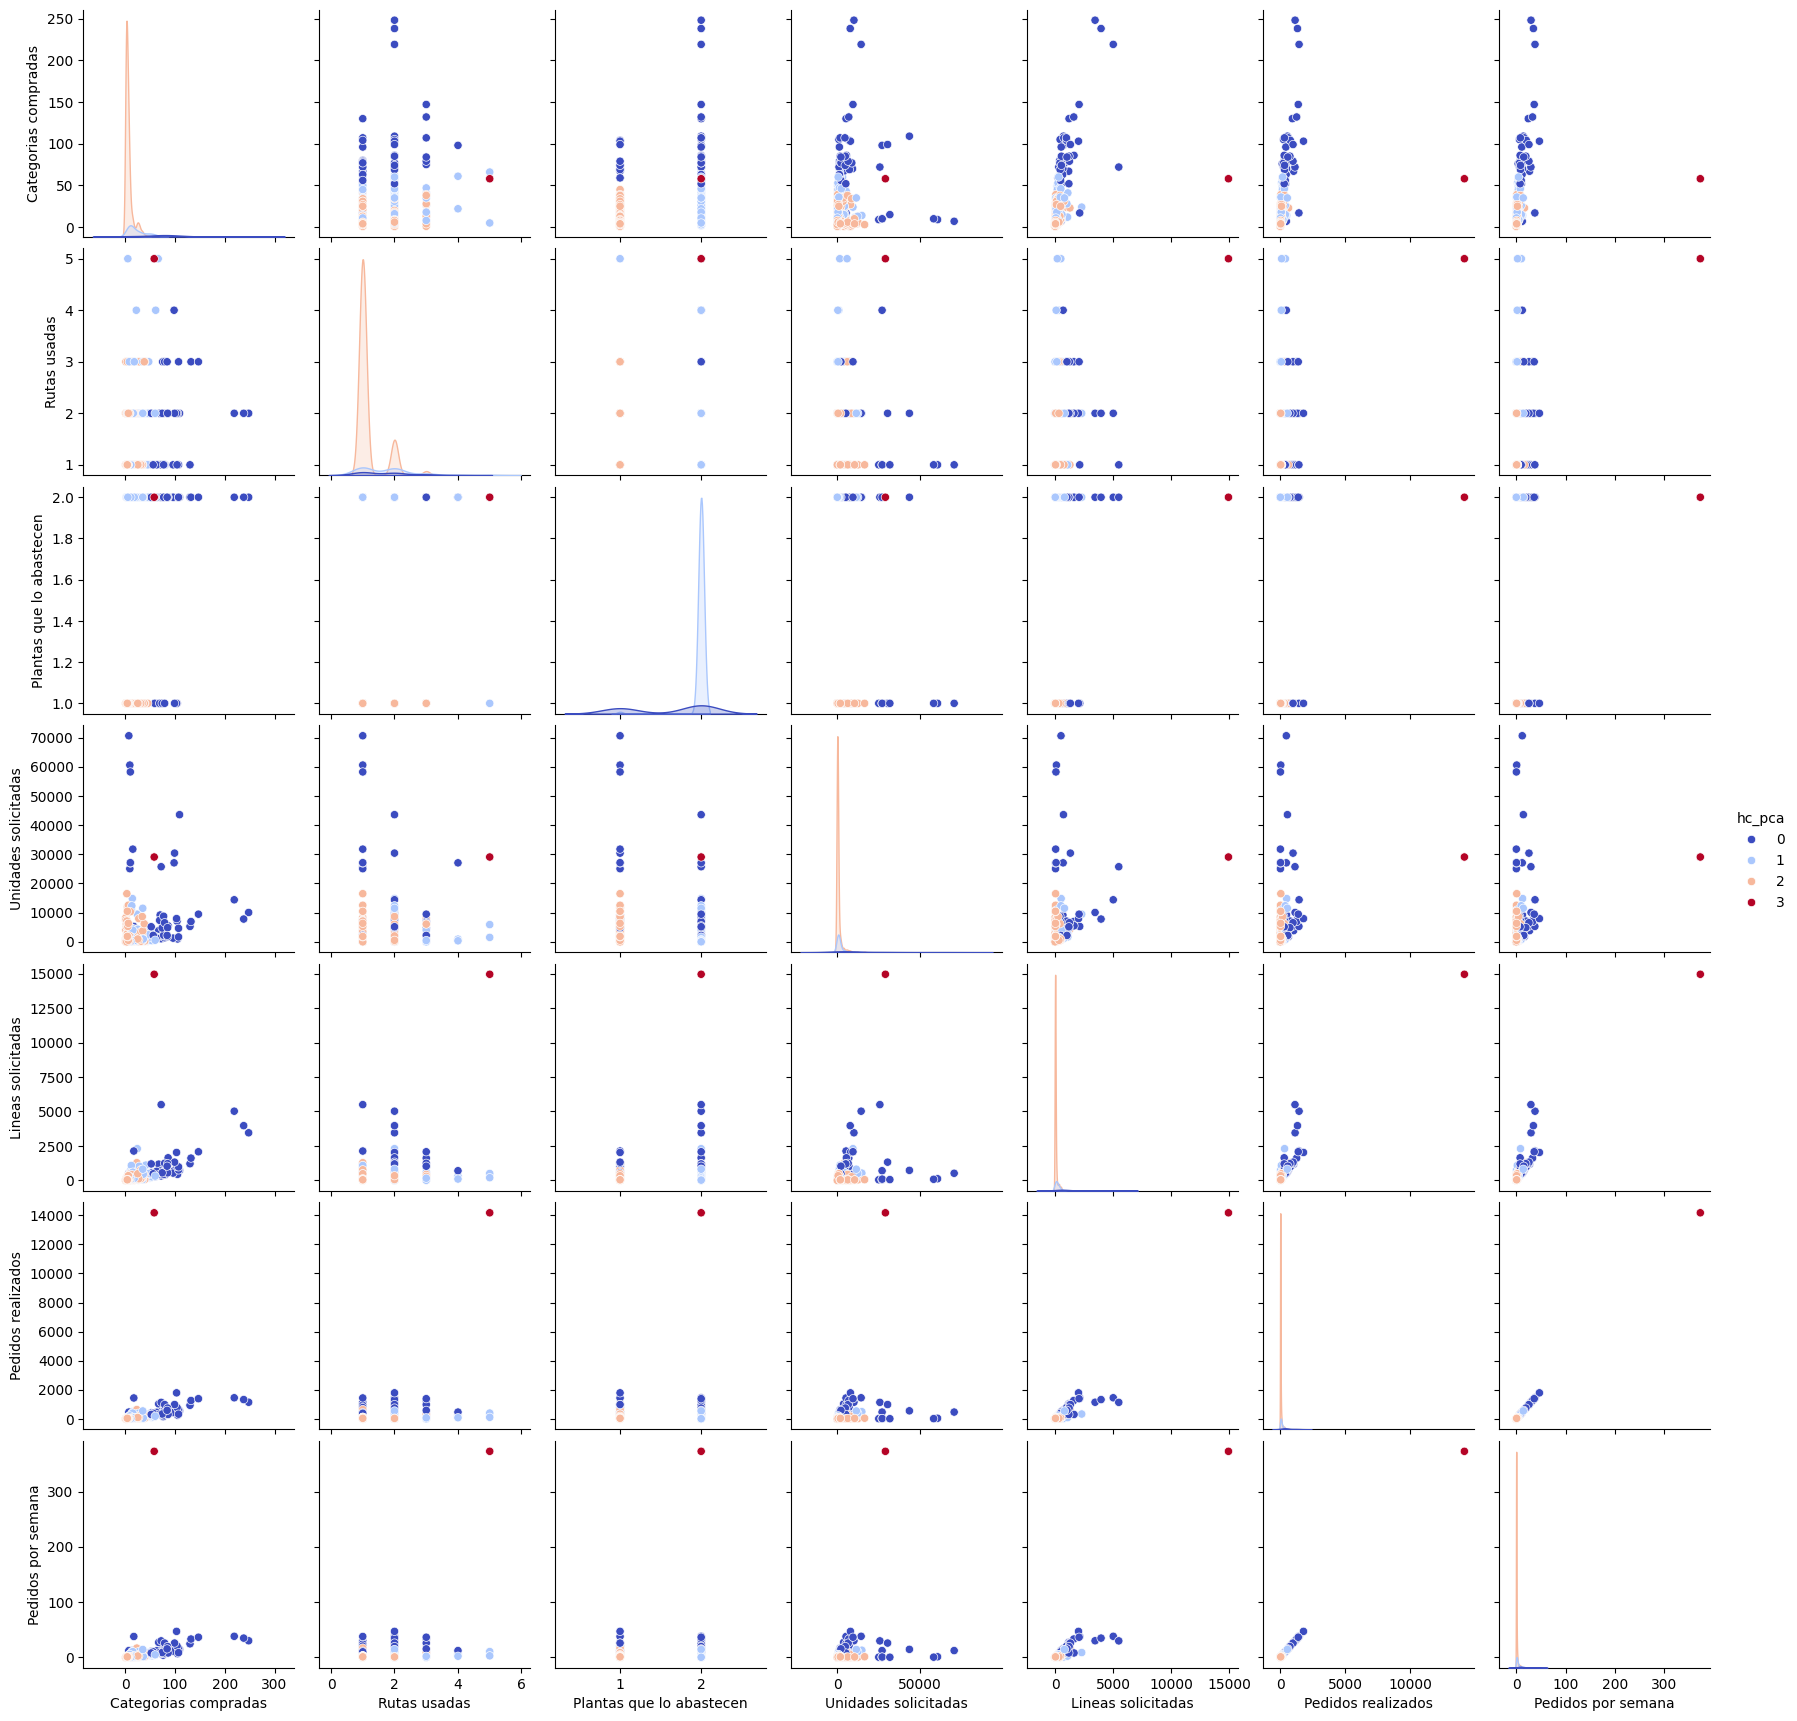

In [134]:
sns.pairplot(data = data[['Categorias compradas', 'Rutas usadas',
       'Plantas que lo abastecen', 'Unidades solicitadas',
       'Lineas solicitadas', 'Pedidos realizados', 'Pedidos por semana','hc_pca']], hue='hc_pca', palette='coolwarm')

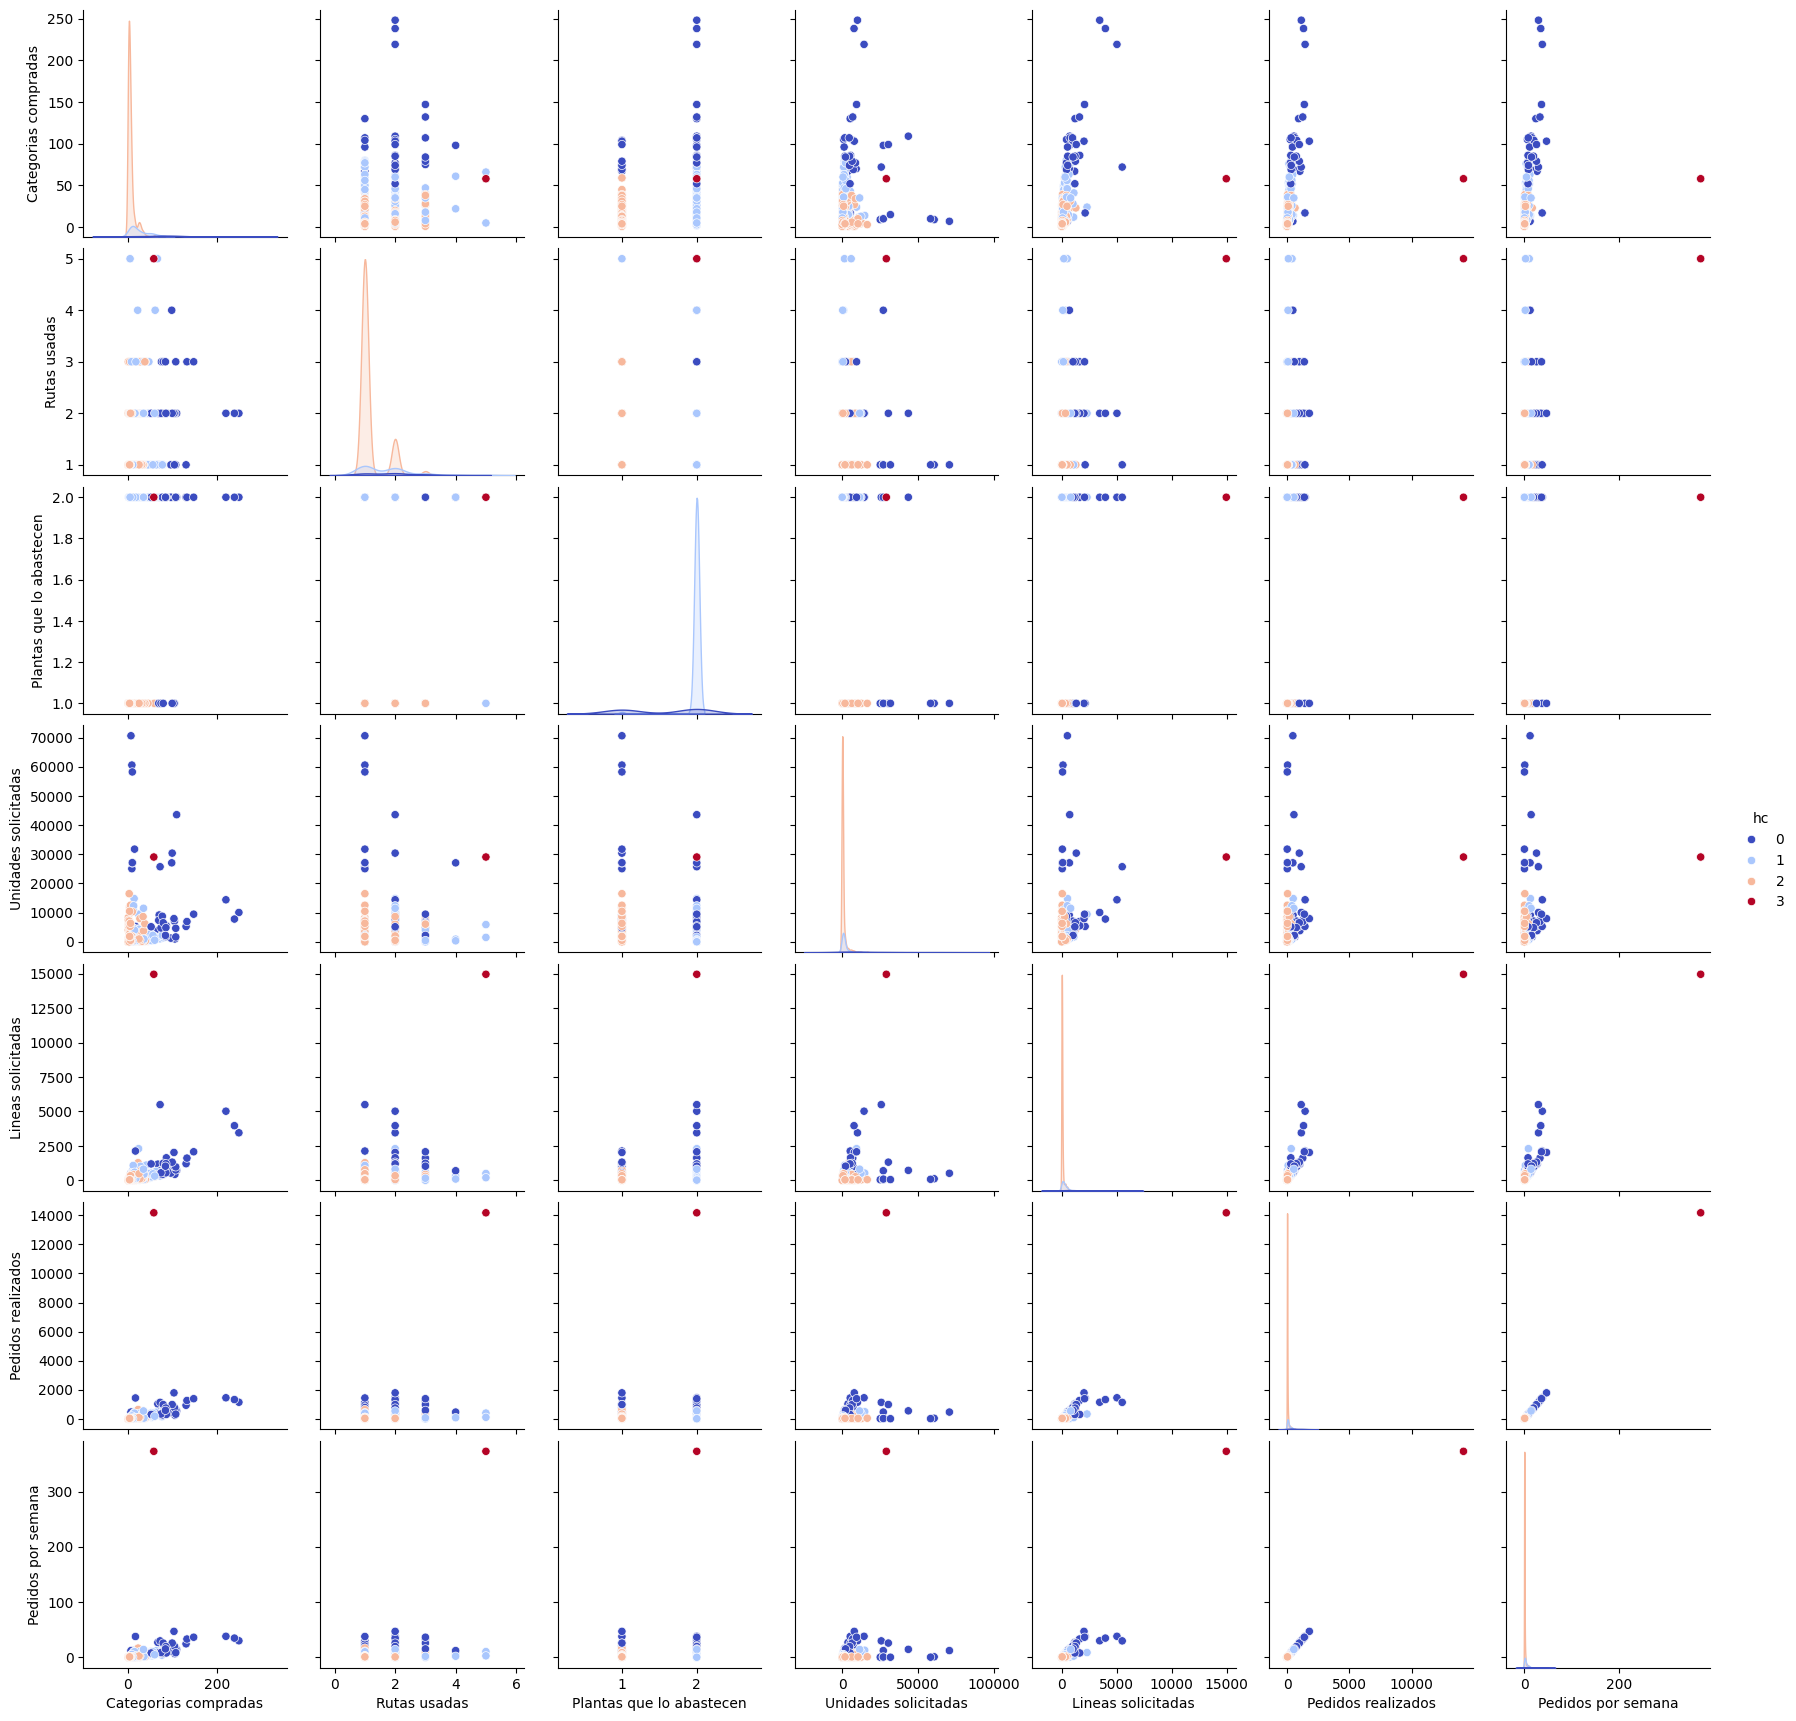

In [135]:
sns.pairplot(data = data[['Categorias compradas', 'Rutas usadas',
       'Plantas que lo abastecen', 'Unidades solicitadas',
       'Lineas solicitadas', 'Pedidos realizados', 'Pedidos por semana','hc']], hue='hc', palette='coolwarm')

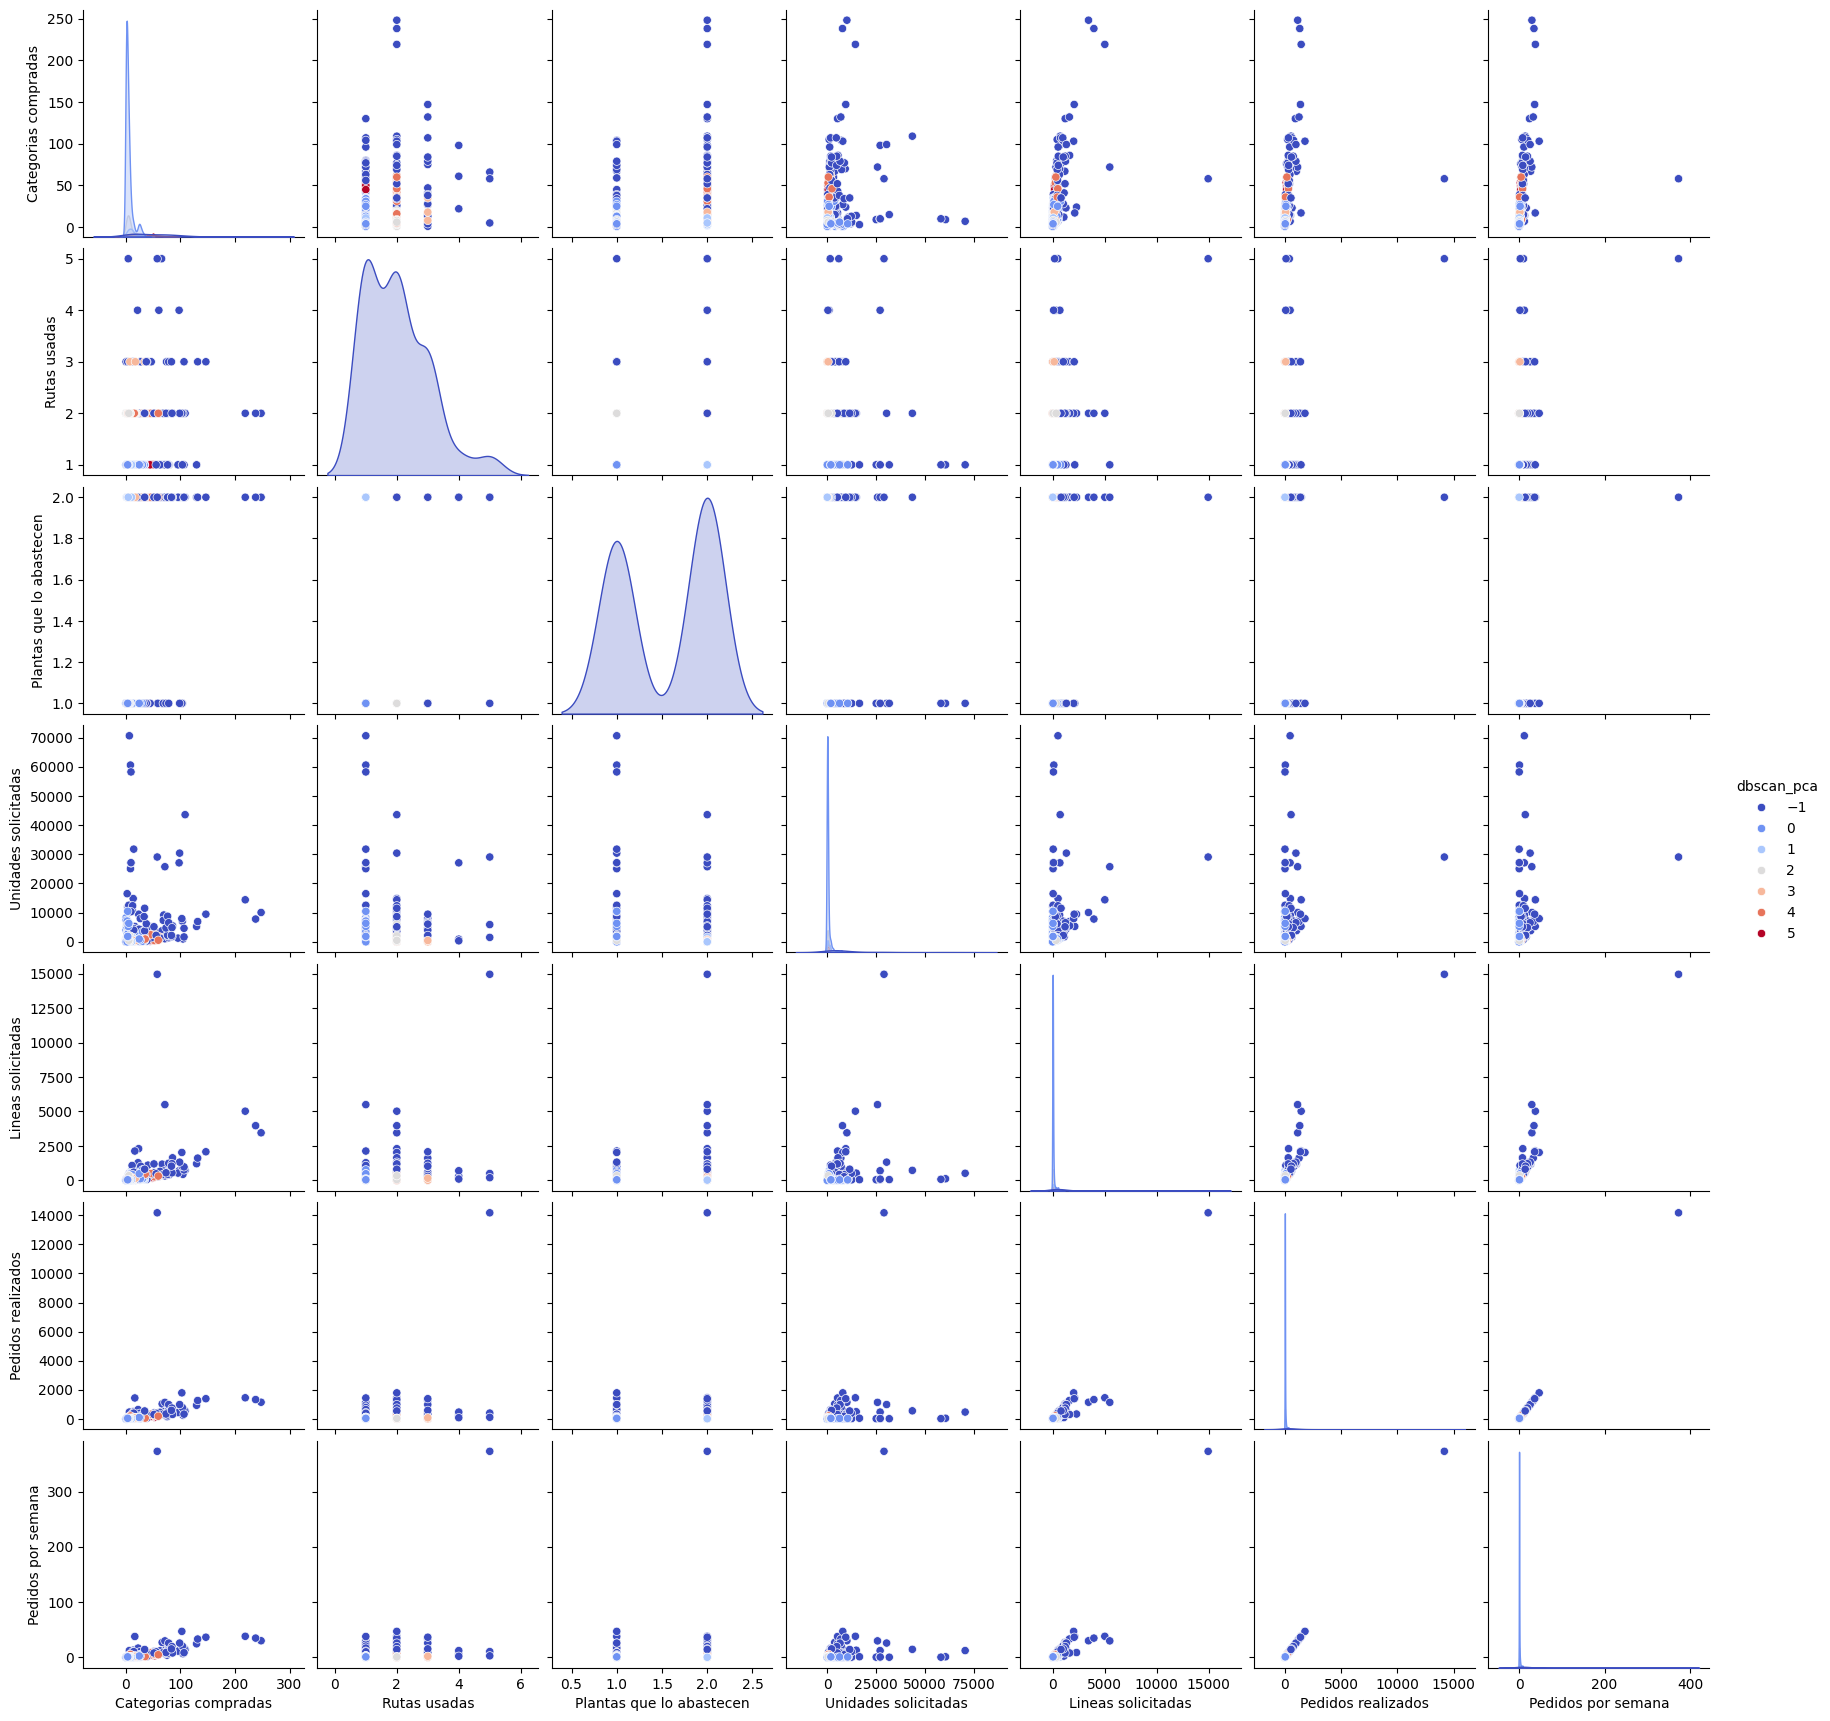

In [136]:
sns.pairplot(data = data[['Categorias compradas', 'Rutas usadas',
       'Plantas que lo abastecen', 'Unidades solicitadas',
       'Lineas solicitadas', 'Pedidos realizados', 'Pedidos por semana','dbscan_pca']], hue='dbscan_pca', palette='coolwarm')

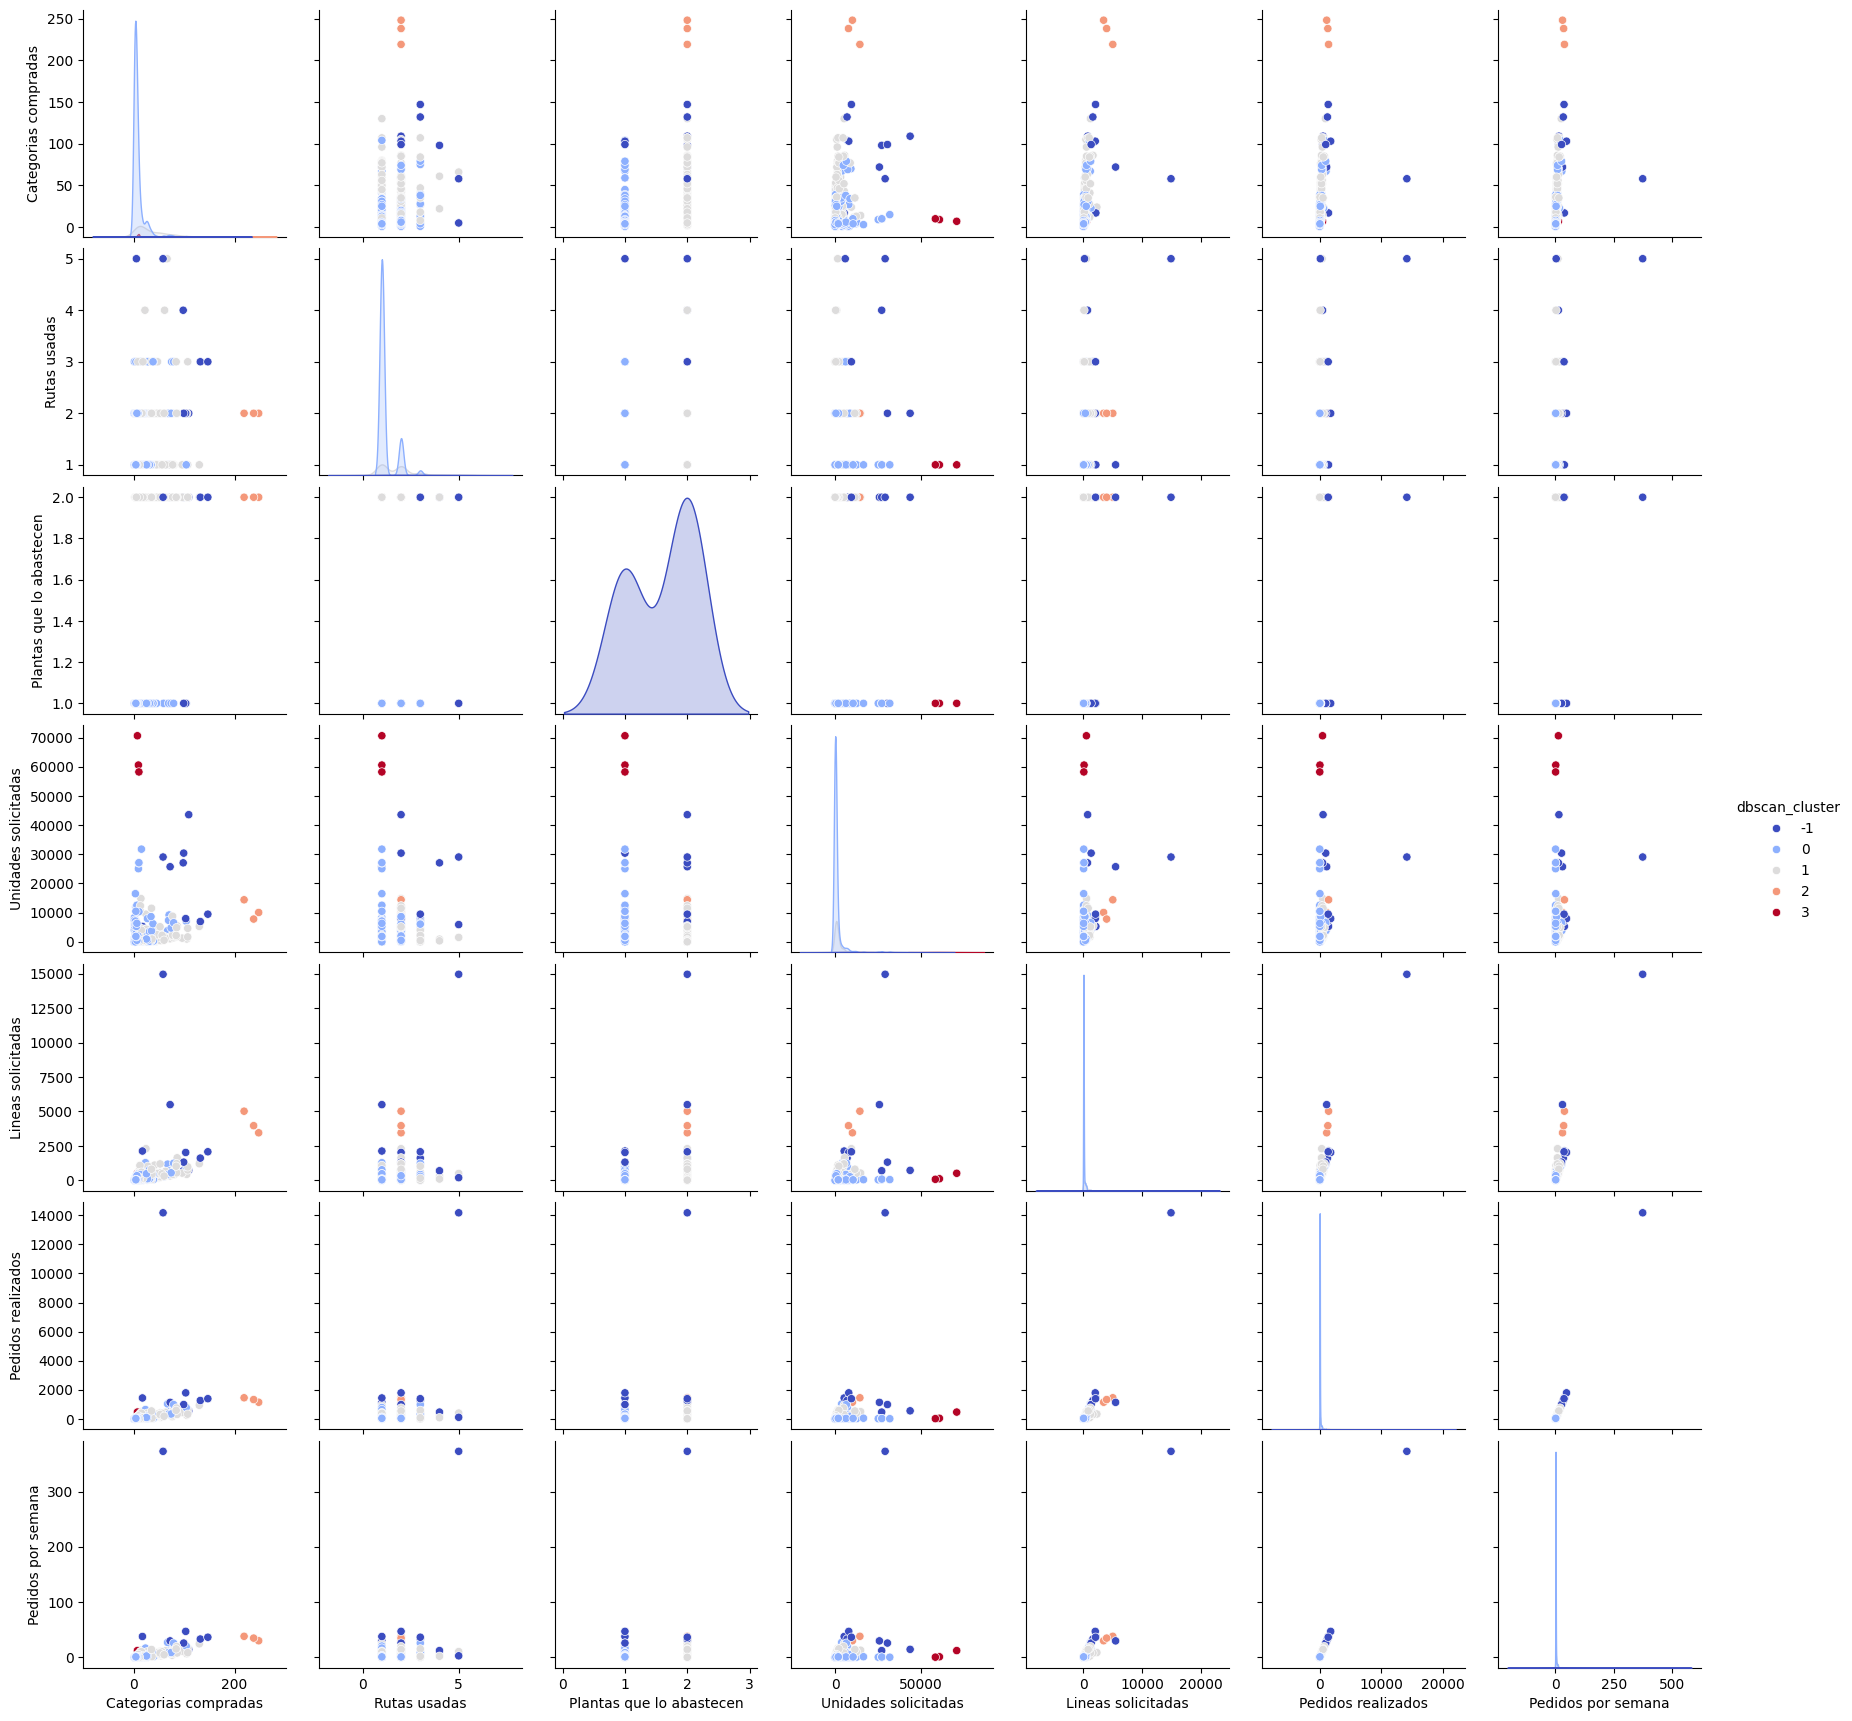

In [137]:
sns.pairplot(data = data[['Categorias compradas', 'Rutas usadas',
       'Plantas que lo abastecen', 'Unidades solicitadas',
       'Lineas solicitadas', 'Pedidos realizados', 'Pedidos por semana','dbscan_cluster']], hue='dbscan_cluster', palette='coolwarm')